In [4]:
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())  # 导入环境

In [2]:
from zhipu_llm import ChatZhipuAI

llm = ChatZhipuAI(
    temperature=0.1,
    model_name="glm-4",
)
llm.invoke("langsmith如何帮助测试?").content

'Langsmith是一个语言建模工具，可以帮助开发者测试和评估语言模型的性能。它可以通过提供一系列的任务和测试来评估模型的准确性、流畅度和语法正确性。使用Langsmith可以帮助开发者发现和修复模型中的错误和问题，从而提高模型的质量和性能。具体来说，Langsmith可以帮助测试以下方面：\n\n1. 准确性：通过提供一系列的标注数据和未标注数据，评估模型在特定任务上的准确率。\n\n2. 流畅度：通过评估模型生成的文本的自然度和流畅度，来衡量模型的语言表达能力和创造力。\n\n3. 语法正确性：通过评估模型生成的文本的语法结构和句法正确性，来衡量模型的语言理解和生成能力。\n\n4. 泛化能力：通过在不同的数据集和任务上测试模型的性能，来评估模型的泛化能力和适应性。\n\n5. 鲁棒性：通过在不同的输入和条件下测试模型的性能，来评估模型对异常和噪声的鲁棒性。\n\n使用Langsmith可以帮助开发者更好地理解和评估语言模型的性能，发现和修复模型中的问题，从而提高模型的质量和效果。'

In [3]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are world class technical documentation writer."),
    ("user", "{input}")
])

chain = prompt | llm  #  combine these into a simple LLM chain
#  it should respond in a more proper tone for a technical writer!
chain.invoke({"input": "how can langsmith help with testing?"})

AIMessage(content="Langsmith is an AI tool designed to help developers create, maintain, and improve natural language processing (NLP) models. While Langsmith itself is not specifically focused on testing, it can indirectly support testing efforts in several ways:\n\n1. **Model Training and Evaluation**: Langsmith can be used to train and evaluate NLP models on test datasets. By doing so, developers can assess the performance of their models and identify areas where they may be failing, which is a critical part of the testing process.\n\n2. **Data Annotation**: Langsmith can assist in data annotation, which is the process of labeling data with relevant tags or categories. High-quality annotated data is essential for testing NLP models, as it provides the ground truth against which model outputs can be compared.\n\n3. **Model Debugging**: If an NLP model is not performing as expected, Langsmith can help in debugging by providing insights into the model's decision-making process. This ca

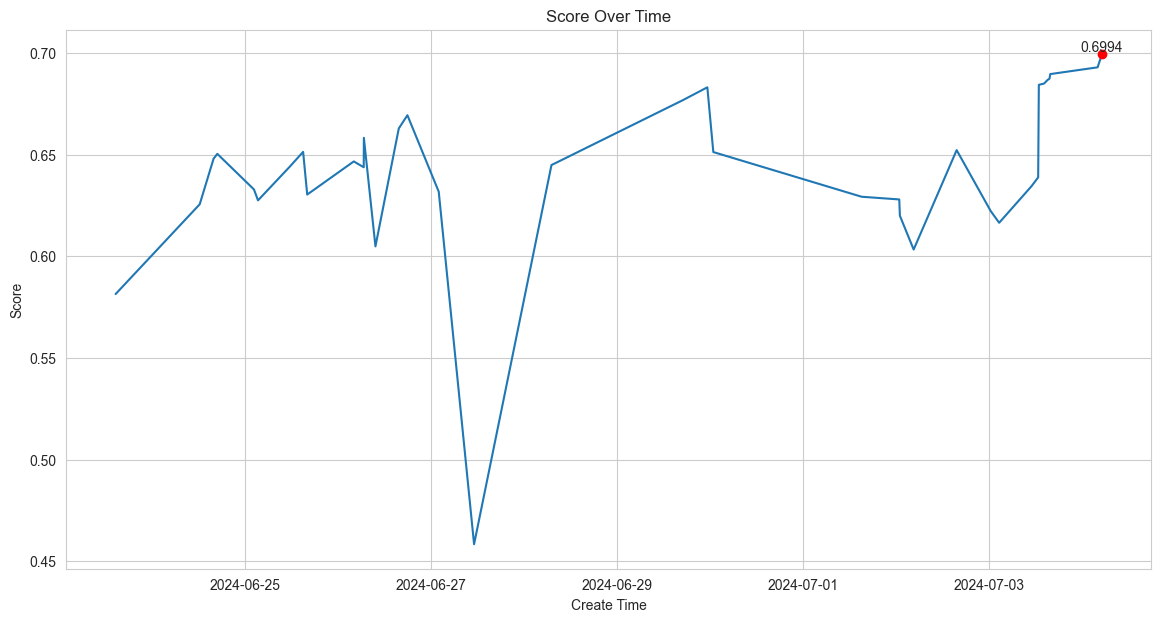

In [460]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data in the form of a list of dictionaries
data = [
    {"Create time": "2024-06-23 14:36:49", "Score": 0.581429046097352},
    {"Create time": "2024-06-24 12:19:14", "Score": 0.6255949846786607},
    {"Create time": "2024-06-24 15:53:48", "Score": 0.6480036457355527},
    {"Create time": "2024-06-24 16:51:38", "Score": 0.6503914459667716},
    {"Create time": "2024-06-25 02:19:02", "Score": 0.632889474162532},
    {"Create time": "2024-06-25 03:21:48", "Score": 0.6275191651454071},
    {"Create time": "2024-06-25 11:37:42", "Score": 0.6442383086618735},
    {"Create time": "2024-06-25 15:00:07", "Score": 0.6513747136608079},
    {"Create time": "2024-06-25 16:03:29", "Score": 0.6303743791221448},
    {"Create time": "2024-06-26 04:04:28", "Score": 0.6466666302962957},
    {"Create time": "2024-06-26 06:38:34", "Score": 0.6437974015088149},
    {"Create time": "2024-06-26 06:40:32", "Score": 0.6582849995517557},
    {"Create time": "2024-06-26 09:39:52", "Score": 0.6048869127548243},
    {"Create time": "2024-06-26 15:41:30", "Score": 0.6629002870729067},
    {"Create time": "2024-06-26 17:54:49", "Score": 0.6693920636365089},
    {"Create time": "2024-06-27 01:59:41", "Score": 0.6317888944658194},
    {"Create time": "2024-06-27 11:06:51", "Score": 0.4583965558116056},
    {"Create time": "2024-06-28 07:05:04", "Score": 0.6448814251926992},
    {"Create time": "2024-06-29 16:59:18", "Score": 0.6768035261223158},
    {"Create time": "2024-06-29 23:18:19", "Score": 0.6831193482814973},
    {"Create time": "2024-06-30 00:50:49", "Score": 0.6512793908958536},
    {"Create time": "2024-07-01 15:06:58", "Score": 0.6292967977690681},
    {"Create time": "2024-07-02 00:49:40", "Score": 0.6279719082990458},
    {"Create time": "2024-07-02 00:59:17", "Score": 0.6199582871913071},
    {"Create time": "2024-07-02 04:32:37", "Score": 0.6033338998395416},
    {"Create time": "2024-07-02 15:38:18", "Score": 0.6522276065531846},
    {"Create time": "2024-07-03 00:25:07", "Score": 0.6222834741975753},
    # {"Create time": "", "Score": },
    {"Create time": "2024-07-03 02:36:23", "Score": 0.616493855532251},
    {"Create time": "2024-07-03 10:56:35", "Score": 0.6344614830658573},
    {"Create time": "2024-07-03 12:40:17", "Score": 0.6388291211568946},
    {"Create time": "2024-07-03 12:50:43", "Score": 0.6843451081742307},
    {"Create time": "2024-07-03 14:11:29", "Score": 0.6849791585909213},
    {"Create time": "2024-07-03 15:05:37", "Score": 0.686729949314608},
    {"Create time": "2024-07-03 15:35:01", "Score": 0.6873378380696884},
    {"Create time": "2024-07-03 15:47:43", "Score": 0.6896306435342638},
    {"Create time": "2024-07-04 04:00:14", "Score": 0.6929481861556552},
    {"Create time": "2024-07-04 05:07:53", "Score": 0.6993959185149118},
]

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Convert 'Create time' to datetime
df['Create time'] = pd.to_datetime(df['Create time'])

# Sort by 'Create time'
df.sort_values('Create time', inplace=True)

# Plot using seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x='Create time', y='Score', data=df)
plt.title('Score Over Time')
plt.xlabel('Create Time')
plt.ylabel('Score')

# 排序数据
df.sort_values('Create time', inplace=True)

# 找到最高点
max_score_index = df['Score'].idxmax()
max_score_time = df.loc[max_score_index, 'Create time']
max_score_value = df.loc[max_score_index, 'Score']

# 在最高点处添加一个大的标记
plt.plot(max_score_time, max_score_value, 'ro')  # 'ro' 表示红色的圆形标记

# 在最高点处添加数据标签
plt.text(max_score_time, max_score_value, f'{max_score_value:.4f}',
         horizontalalignment='center', verticalalignment='bottom')

plt.show()

In [223]:
import jsonlines


def read_jsonl(path):
    content = []
    with jsonlines.open(path, "r") as json_file:
        for obj in json_file.iter(type=dict, skip_invalid=True):
            content.append(obj)
    return content

In [525]:
num = 92
content = read_jsonl(path="aiops-2024-submit/result.jsonl")[num]
print("query:" + content["query"])
print("answer:" + content["answer"])

query:uMAC网元VNFC有哪几种备份方式
answer:uMAC网元VNFC支持以下几种备份方式：1+1互备冗余、USUP备份、以及MME间的链式备份和集中备份。其中，1+1互备冗余是指两个实例都工作，当一个实例故障时，另一个实例接管业务；USUP备份是USUP模块互为备份，异常时业务会倒换到其他USUP模块；MME间备份关系可支持链式备份和集中备份，用于用户关键信息的备份和故障恢复。


In [528]:
content = read_jsonl(path="submit_result_ReImageSummary_with_context.jsonl")[num]
print("answer:" + content["answer"])
print("context:" + content["context"])

answer:uMAC网元VNFC支持的备份方式包括：AMF部分备份（无UDSF部分备份）、USUP备份、CDU（UDSF/CDB）1+1互备、OMU备份、链式备份和集中备份、自动备份NF数据、GSU的N+M负荷分担备份。
context:
特性描述: 协议栈

该特性涉及的接口协议栈参见下表。

表1 协议栈接口| 协议栈信息参考  
---|---  
N1| ZUF-79-19-001 N1  
N2| ZUF-79-19-002 N2  
N8| ZUF-79-19-003 N8  
N11| ZUF-79-19-004 N11  
N12| ZUF-79-19-005 N12  
N14| ZUF-79-19-006 N14  
N15| ZUF-79-19-007 N15  
N18| ZUF-79-19-011 N18  
N22| ZUF-79-19-008 N22  
Nnrf| ZUF-79-19-010 Nnrf  
  
本网元实现

AMF向gNodeB下发本AMF的Served GUAMI和权重因子。

根据维护需要，AMF发起负荷重平衡过程。

AMF将用户关键信息同步到为其备份的AMF。

备份AMF需要保存用户关键信息，用于故障后被叫业务恢复流程。

备份AMF将其作为备份的GUAMI通过NF注册流程携带给NRF。

业务流程

AMF部分备份（也称无UDSF部分备份）

AMF部分备份（也称无UDSF部分备份）原理如图2所示。AMF Set内的AMF相互指定备份关系，用于用户关键信息（如SUPI/TAList/5G-GUTI）的备份。

如下图所示，AMF1备份到AMF2，AMF2备份到AMF3，AMF3备份到AMF1。

图2 AMF部分备份原理图

当某个AMF故障时，如AMF1故障，此时用户发起的业务由gNodeB选择AMF Set内的其他AMF进行处理，选择的AMF接收用户业务消息后，查询用户上下文数据失败，则触发用户重注册。

此时SMF或PCF发起的业务由SMF或PCF选择备份AMF进行处理，备份AMF接收业务消息后，查询用户上下文数据失败，再次查询用户备份数据并触发寻呼用户，用户接收寻呼消息后发起业务请求的流程同上述用户发起的业务。

用户重新进行注册后，业务恢复正常。

AMF状态订阅及故障检测

图3 状态订阅及

In [527]:
content = read_jsonl(path="submit_result_allSummary2_with_context.jsonl")[num]
print("answer:" + content["answer"])
print("context:" + content["context"])

answer:uMAC网元VNFC的备份方式主要有部分备份方式，其中包括数据备份功能，将数据从主用AMF备份到另一个AMF，以及网元数据备份和恢复功能，支持批量备份和恢复MEP数据。具体操作涉及配置部分备份容灾功能，以及控制策略和参数配置。
context:
: # 部分备份配置
## 背景知识
UDSF内置于AMF的场景，同时不采用全量备份的方式（如网络带宽条件不允许或非全量备份即满足运营商要求），即采用部分备份的方式。 主用AMF故障或者退出服务后，上行流程接管AMF触发用户重注册，下行流程接管AMF先触发寻呼用户再触发重注册进行恢复。
在部分备份容灾功能启用时，需要先进行数据备份。通过数据备份功能，可以将数据从本AMF备份到另一个AMF。在本AMF故障后，其备份AMF上的数据将用于业务恢复。
## 功能说明
本功能用于配置部分备份容灾功能启用时，在AMF触发UE的重注册流程中，AMF对于终端用户发送的注册及业务请求消息，是发送拒绝消息还是发送去注册消息，以及发送拒绝消息时，AMF携带的原因值。
## 相关主题
* 控制策略配置(7284806)
* 控制参数配置(7284807)
* Old AMF延时定时器配置(7284808)
**父主题：**
部分备份配置
: 网元备份恢复
网元备份恢复功能提供以下操作：
* 在对MEP数据执行操作前，用户可以通过网元数据备份功能批量备份MEP数据。
* 网元数据恢复功能支持批量性对MEP进行数据恢复操作，将MEP数据快速恢复到执行操作之前的状态。
子主题：
* 备份网元数据
* 恢复网元数据
